In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import stdev
from scipy.stats import median_abs_deviation, skew, kurtosis
from scipy.stats import norm, logistic
from scipy.stats import pearsonr
from scipy.special import erf
import seaborn as sns; sns.set()
import csv

# MIEDŹ

## Ceny miedzi na przestrzeni 5 lat (Open) (cena za nie wiem jaką ilość)

In [96]:
copper_ = pd.read_csv('data/copper.csv', sep = ',', encoding = 'latin-1')
copper_

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,4.1065,98124,4.1285,4.1955,4.0950
1,04/13/2023,4.1240,88437,4.0700,4.1430,4.0535
2,04/12/2023,4.0810,88325,4.0295,4.0880,3.9840
3,04/11/2023,4.0195,81243,3.9870,4.0540,3.9780
4,04/10/2023,3.9765,53745,4.0180,4.0395,3.9630
...,...,...,...,...,...,...
1255,04/20/2018,3.1555,33960,3.1490,3.1685,3.1275
1256,04/19/2018,3.1540,37634,3.1835,3.2180,3.1350
1257,04/18/2018,3.1815,51721,3.1100,3.2015,3.0995
1258,04/17/2018,3.0795,88784,3.0835,3.1020,3.0545


In [97]:
def equalize(df): #funkcja ta skaluje ceny miedzi do cen za tonę
    d = 2204.623
    col_names = [col for col in df.columns][1:]
    col_names.remove('Volume')
    for name in col_names:
        df[name] = df[name]*d
    return df

In [98]:
copper = equalize(copper_)
copper

,Date,Close/Last,Volume,Open,High,Low
0,04/14/2023,9053.284349,98124,9101.786056,9249.495796,9027.931185
1,04/13/2023,9091.865252,88437,8972.815610,9133.753089,8936.439330
2,04/12/2023,8997.066463,88325,8883.528378,9012.498824,8783.218032
3,04/11/2023,8861.482148,81243,8789.831901,8937.541642,8769.990294
4,04/10/2023,8766.683360,53745,8858.175214,8905.574609,8736.920949
...,...,...,...,...,...,...
1255,04/20/2018,6956.687877,33960,6942.357827,6985.347975,6894.958432
1256,04/19/2018,6953.380942,37634,7018.417320,7094.476814,6911.493105
1257,04/18/2018,7014.008075,51721,6856.377530,7058.100534,6833.228989
1258,04/17/2018,6789.136529,88784,6797.955020,6838.740546,6734.020954


In [99]:
def draw_stock(df, clr):
    fig, ax = plt.subplots(figsize = (15, 4))
    plt.xticks(rotation = 45)
    xloc = plt.MaxNLocator(9)
    ax.xaxis.set_major_locator(xloc)
    dates = df['Date'].values[::-1]
    prices = df['Open'].values[::-1]
    plt.plot(dates, prices, color = clr)
    plt.ylabel('USD')
    plt.show()

## Wykres cen miedzi

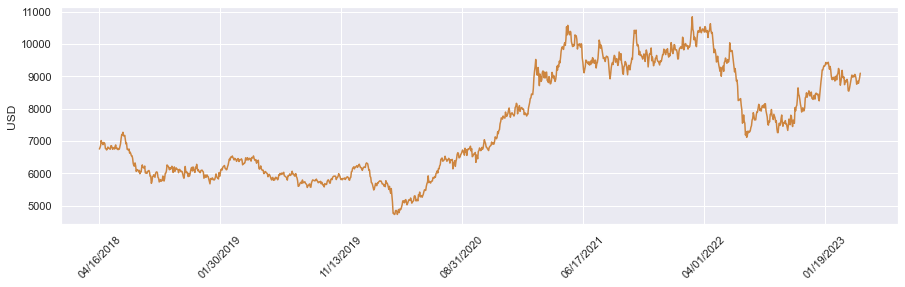

In [100]:
draw_stock(copper, 'peru')

## Histogram logarytmicznych przyrostów

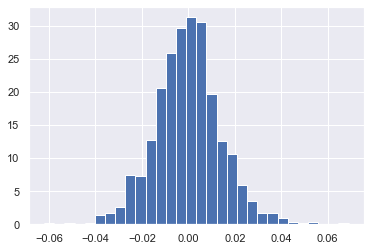

In [101]:
s = np.array(copper['Open'].values[1:])
s2 = np.array(copper['Open'].values[:-1])
r = np.log(s/s2)
plt.hist(r, bins = 30, density = True)
plt.show()

## Miary ryzyka

In [102]:
print('Średnia: ' + str(np.mean(r)))
print('Wariancja: ' + str(np.var(r)))
print('Skośność: ' + str(skew(r)))
print('Kurtoza: ' + str(kurtosis(r)))
print('Odchylenie standardowe: ' + str(stdev(r)))
print('Odchylenie przeciętne: ' + str(median_abs_deviation(r)))
print('Pierwszy kwartyl: ' + str(np.quantile(r, .25)))
print('Mediana: ' + str(np.quantile(r, .5)))
print('Trzeci kwartyl: ' + str(np.quantile(r, .75)))
print('Odchylenie ćwiartkowe: ' + str(0.5*(np.quantile(r, .75) - np.quantile(r, .25))))

Średnia: -0.0002367193970863344
Wariancja: 0.00020321096766212561
Skośność: 0.17440041345123358
Kurtoza: 1.184339957347377
Odchylenie standardowe: 0.014260873136402709
Odchylenie przeciętne: 0.008379502169224238
Pierwszy kwartyl: -0.00903230848294452
Mediana: -0.0001925113106339907
Trzeci kwartyl: 0.007855416857546486
Odchylenie ćwiartkowe: 0.008443862670245503


In [103]:
mu = np.mean(r)
s = stdev(r)

## Porównanie kwantyli (parametryczne i nieparametryczne) 95%, 97.5% i 99%

In [177]:
#Porównanie histogramu z wykresami funkcji gęstości
def norm_kde(x, mi, sigma, portfolio = False):
    x = np.array(sorted(x))
    y = norm.pdf(x, mi, sigma) #rozkład normalny
    y2 = logistic.pdf(x, mi, math.sqrt(3)/math.pi*sigma) #rozkład logistyczny
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    if portfolio == False:
        plt.plot(x, y, color = 'blue', label = 'normal pdf')
        plt.plot(x, y2, color = 'red', label = 'logistic pdf')
    plt.hist(x, bins = 50, density = True, color = 'white', ec = 'black')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

In [166]:
norm_kde(r, mu, s)

ValueError: operands could not be broadcast together with shapes (1259,) (951,) 

In [106]:
def comp_quantile(x, p1, p2, p3): #p ma być z zakresu [0, 1]
    mi = np.mean(x)
    sigma = stdev(x)
    p = [p1, p2, p3]
    real = np.quantile(x, p)
    nrm = norm.ppf(p, mi, sigma)
    lgstc = logistic.ppf(p, mi, math.sqrt(3)/math.pi*sigma)
    perc = [format(p, '.2%') for p in [p1, p2, p3]]
    dct = {'p' : perc, 'real' : real, 'normal' : nrm, 'logistic' : lgstc}
    df = pd.DataFrame(dct)
    return df

In [107]:
comp_quantile(r, .95, .975, .99)

,p,real,normal,logistic
0,95.00%,0.023471,0.023220,0.022914
1,97.50%,0.028709,0.027714,0.028568
2,99.00%,0.037609,0.032939,0.035892


## Wartości dystrybuanty

In [175]:
#Porównanie dystrybuant teoretycznych z dystrybuantą empiryczną
def cdf(x, mi, sigma, portfolio = False):
    x = np.array(sorted(x))
    y = norm.cdf(x, mi, sigma)
    y2 = logistic.cdf(x, mi, math.sqrt(3)/math.pi*sigma)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    if portfolio == False:
        plt.plot(x, y, color = 'red', label = 'CDF', lw = .7)
        plt.plot(x, y2, color = 'black', label = 'Logistic cdf', linestyle = 'dashdot', lw = .7)
    sns.ecdfplot(data = x, color = 'blue', label = 'ECDF', linestyle = 'dashdot', lw = .7)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

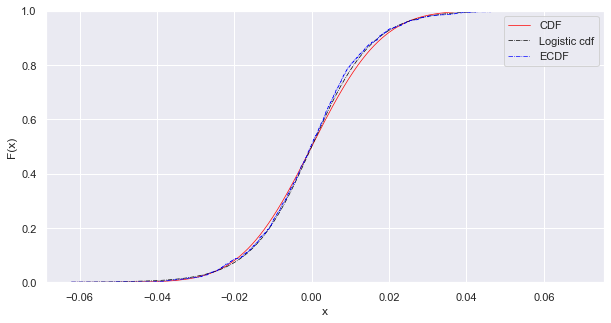

In [109]:
cdf(r, 0, s)

Sprawdzimy wartości dystrybuant dla $x \in \{-0.05, -0.03, -0.01, 0, 0.01, 0.03, 0.05\}$

In [110]:
def comp_dist(x, x0 = [-0.05, -0.03, -0.01, 0, 0.01, 0.03, 0.05]):
    x = sorted(x)
    mi = np.mean(x)
    sigma = stdev(x)
#     real = [np.linspace(0, 1, len(x))]
    nrm = norm.cdf(x0, mi, sigma)
    lgstc = logistic.cdf(x0, mi, sigma)
    dct = {'x0' : x0, 'normal' : nrm, 'logistic' : lgstc}
    df = pd.DataFrame(dct)
    return df

In [111]:
comp_dist(r)

,x0,normal,logistic
0,-0.05,0.000242,0.029613
1,-0.03,0.018441,0.110361
2,-0.01,0.246792,0.335231
3,0.00,0.506622,0.504150
4,0.01,0.763565,0.672126
5,0.03,0.983008,0.892857
6,0.05,0.999786,0.971327


## Miary wrażliwości

# ALUMINIUM (jeszcze do uzgodnienia)

## Ceny aluminium (Open) (w USD za tonę)

In [112]:
aluminium = pd.read_csv('data/aluminium.csv', sep = ',', encoding = 'latin-1')
aluminium

,Date,Close/Last,Volume,Open,High,Low
0,04/12/2023,2328.50,1205.0,2311.00,2335.0,2293.50
1,04/11/2023,2306.75,1979.0,2333.75,2335.5,2302.50
2,04/10/2023,2348.00,2215.0,2348.00,2348.0,2348.00
3,04/06/2023,2338.25,1373.0,2355.00,2359.5,2329.25
4,04/05/2023,2370.00,NaN,2370.00,2370.0,2370.00
...,...,...,...,...,...,...
1254,04/19/2018,2300.00,NaN,2300.00,2300.0,2300.00
1255,04/18/2018,2300.00,NaN,2300.00,2300.0,2300.00
1256,04/17/2018,2300.00,NaN,2300.00,2300.0,2300.00
1257,04/16/2018,2300.00,NaN,2300.00,2300.0,2300.00


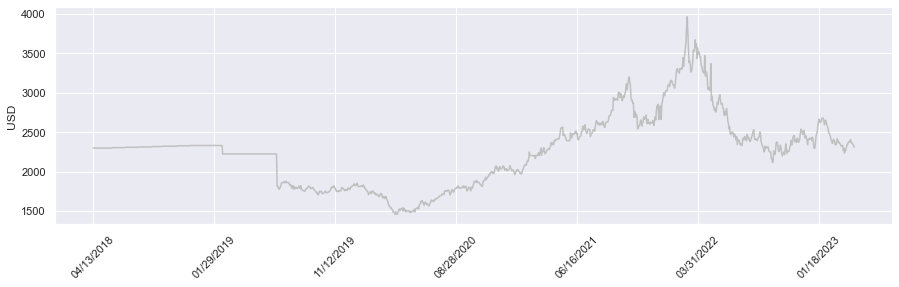

In [113]:
draw_stock(aluminium, 'silver')

In [114]:
idx = aluminium.index[aluminium['Date'] == '07/01/2019'].tolist()[0]
idx

952

In [115]:
aluminium2 = aluminium.drop(aluminium.index[idx:1259])

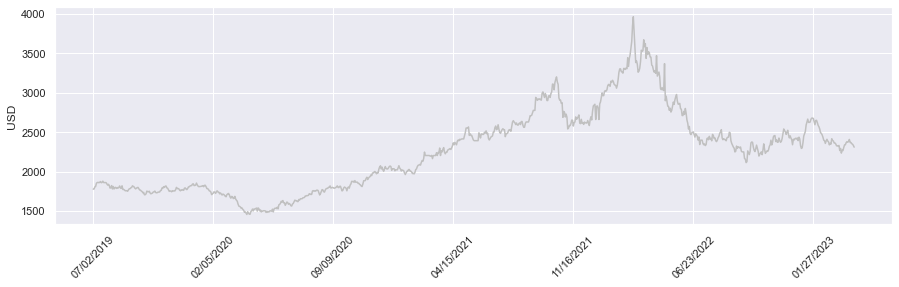

In [116]:
draw_stock(aluminium2, 'silver')

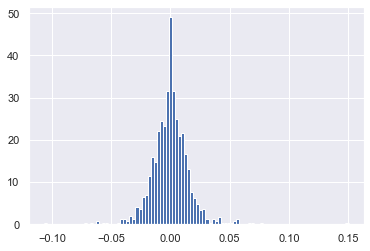

In [117]:
#logarytmiczne stopy zwrotu
s_ = np.array(aluminium2['Open'].values[1:])
s2_ = np.array(aluminium2['Open'].values[:-1])
r2 =  np.log(s_/s2_)
plt.hist(r2, bins = 100, density = True)
plt.show()

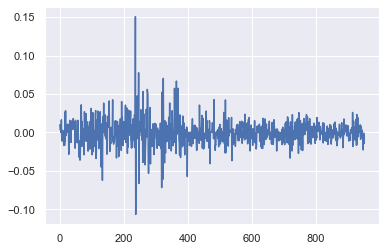

In [118]:
plt.plot([*range(len(r2))], r2)
plt.show()

In [119]:
mu2 = np.mean(r2)
s2 = stdev(r2)
print('Średnia: ' + str(mu2))
print('Odchylenie standardowe: ' + str(s2))

Średnia: -0.0002754048568726295
Odchylenie standardowe: 0.016525948225364212


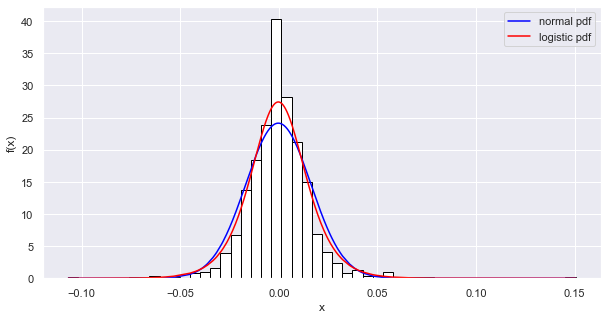

In [120]:
norm_kde(r2, mu2, s2)

In [121]:
comp_quantile(r2, .95, .975, .99)

,p,real,normal,logistic
0,95.00%,0.023344,0.026907,0.026552
1,97.50%,0.031319,0.032115,0.033104
2,99.00%,0.050773,0.038170,0.041592


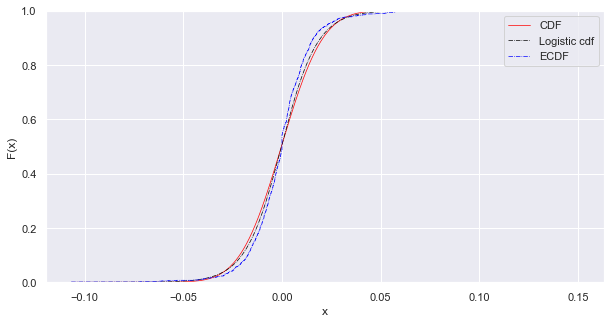

In [122]:
cdf(r2, mu2, s2)

In [123]:
comp_dist(r)

,x0,normal,logistic
0,-0.05,0.000242,0.029613
1,-0.03,0.018441,0.110361
2,-0.01,0.246792,0.335231
3,0.00,0.506622,0.504150
4,0.01,0.763565,0.672126
5,0.03,0.983008,0.892857
6,0.05,0.999786,0.971327


# PRZYPADEK WIELOWYMIAROWY

In [199]:
idx = 952 #liczone przy aluminium

In [200]:
stock1 = copper['Open'].values[:idx][::-1]
stock2 = aluminium['Open'].values[:idx][::-1]

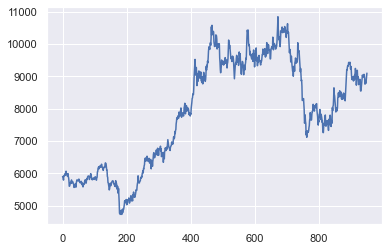

In [201]:
plt.plot(stock1)

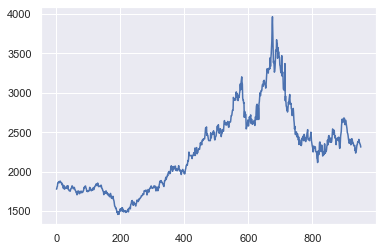

In [202]:
plt.plot(stock2)

In [203]:
s = np.array(stock1[1:])
s2 = np.array(stock1[:-1])
r1 = np.log(s/s2)

In [204]:
r1

array([-0.00317906, -0.00450536, -0.01116273,  0.02294628, -0.00037195,
        0.003528  ,  0.00646654, -0.00795049,  0.00278061,  0.00682597,
        0.01224319, -0.01353102, -0.00368868,  0.00203046, -0.0100075 ,
        0.00223256,  0.01035321, -0.01519673, -0.00674539, -0.01515468,
       -0.030229  ,  0.00098319,  0.00626961,  0.00952481,  0.00482487,
        0.00019251, -0.00598515,  0.01860965, -0.01474416,  0.00057854,
        0.00288767,  0.00172861, -0.00867308, -0.00310198, -0.00311163,
       -0.01649684,  0.0076931 ,  0.00392234,  0.00566021,  0.00233282,
       -0.01743262, -0.00059294,  0.02402694,  0.00903071,  0.00667241,
       -0.0015212 , -0.00171412, -0.00190803,  0.00324149, -0.00209624,
        0.00816951, -0.00664454, -0.00458191, -0.00768348,  0.00038558,
        0.00423159, -0.00038395,  0.00287604, -0.01329884,  0.00811599,
       -0.00928081, -0.00682197,  0.00370913, -0.01314131,  0.01858244,
       -0.00232829, -0.00291801,  0.00097362,  0.01621657,  0.00

In [205]:
s_ = np.array(stock2[1:])
s2_ = np.array(stock2[:-1])
r2 =  np.log(s_/s2_)

## Wykres wartości portfela (to jest źle - nie brać tego!)

In [211]:
#funkcja tworzy portfel z dwóch zmiennych ryzyka - w1 i w2 to wagi portfela
def portfolio(x1, x2, w1, w2):
    try:
        x = w1*x1 + w2*x2
    except ValueError:
        print('Rozmiary próbek muszą być równe.')
    return x
        

In [212]:
port = portfolio(r1, r2, 1/3, 2/3)

In [213]:
port

array([-3.10411884e-04,  8.25516572e-03, -1.32680082e-03,  2.28246794e-02,
        2.20796064e-03,  2.42829101e-03,  3.65801498e-04, -1.03920814e-03,
        4.67069641e-03, -3.07945944e-03,  5.15546469e-03,  1.54545133e-03,
       -7.73280747e-03,  6.76819183e-04, -3.33583214e-03,  7.44186356e-04,
       -2.48368807e-03, -1.05981133e-02,  1.38460713e-03, -9.86965173e-03,
       -2.29734245e-02,  1.90717852e-03,  1.22203786e-02, -1.23597477e-02,
        1.28333043e-02, -1.13479794e-02,  4.52360271e-03,  7.12927128e-03,
       -9.83753473e-03,  4.37491812e-03, -1.63653639e-03,  3.82348979e-03,
        3.83140941e-03, -1.06317966e-02, -2.89888932e-03,  6.69313628e-03,
       -1.46803703e-02,  1.30744758e-03, -4.65488001e-04, -3.19291123e-03,
       -5.33695171e-03, -5.76758990e-04,  5.63463920e-03,  9.91974152e-03,
        7.00918310e-03,  2.40421635e-04,  3.33925144e-03,  1.12557346e-03,
        8.63018046e-03, -3.08330365e-03,  1.45611418e-04, -8.14410659e-03,
       -4.69880302e-03,  

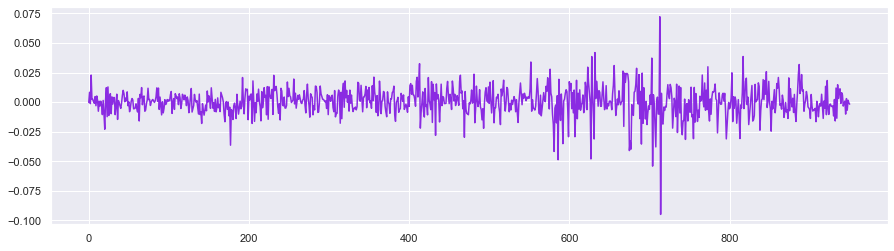

In [215]:
fig, ax = plt.subplots(figsize = (15, 4))
plt.plot(port, color = 'blueviolet')
plt.show()

## Dwuwymiarowy rozkład empiryczny zwrotów logarytmicznych

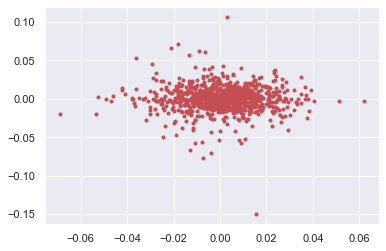

In [216]:
plt.plot(r1, r2, '.r')
plt.show()

In [226]:
corr = np.corrcoef(r1, r2)
print('Korelacja Pearsona: ' + str(corr))

Korelacja Pearsona: [[ 1.         -0.02699923]
 [-0.02699923  1.        ]]


Text(0, 0.5, 'Counts')

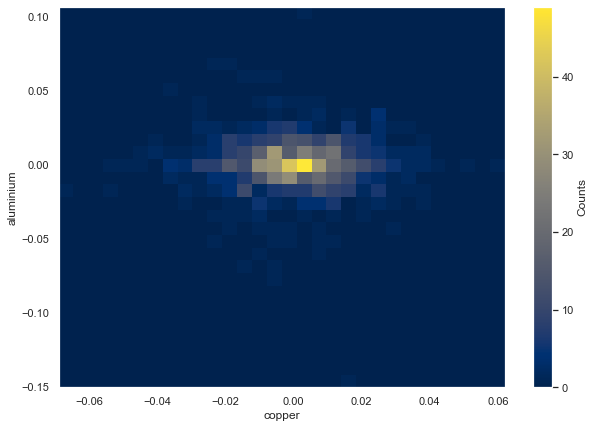

In [217]:
fig2 = plt.figure(figsize = (10, 7))
plt.hist2d(r1, r2, bins = 30, cmap = 'cividis')
plt.xlabel('copper')
plt.ylabel('aluminium')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

## Dystrybuanta zwrotów log portfela

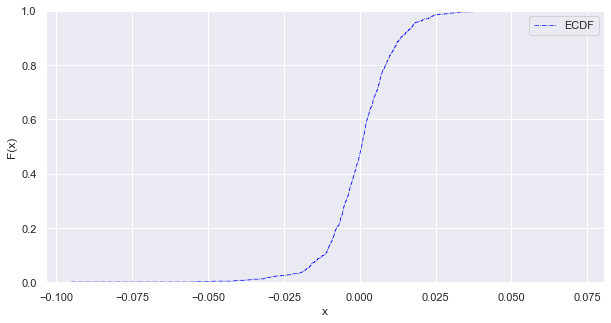

In [221]:
cdf(port, np.mean(port), stdev(port), True)